# Week 5: Classifications Tasks on the Iris Dataset

## 1. Decision Trees

Part of this Notebook was originally developed by [Jude Fletcher](https://eng.ox.ac.uk/people/jude-fletcher/).

Decision Trees are a non-parametric supervised machine learning technique for classification and regression. Its aim is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features or input vectors.

<h3>Dataset: Iris </h3>

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in 1936. 
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Source: https://en.wikipedia.org/wiki/Iris_flower_data_set

<img src="images/iris-data-set-01.png" width="500" style="float: left;"> 

<img src="images/iris-species.png" width="500" style="float: left;"> 


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

<h3>Classification</h3>

<strong>DecisionTreeClassifier</strong> is a class capable of performing multi-class classification on a dataset - i.e. capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

As with other classifiers, <strong>DecisionTreeClassifier</strong> takes as input two arrays:
1. An array X, sparse or dense, of size <i>[n_samples, n_features]</i> holding the training samples<br>
2. And an array Y of integer values, size <i>[n_samples]</i>, holding the class labels for the training samples

For example:

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Data Visualization and Exploration

Let's have a very quick overview of the data plotting the scatter matrix

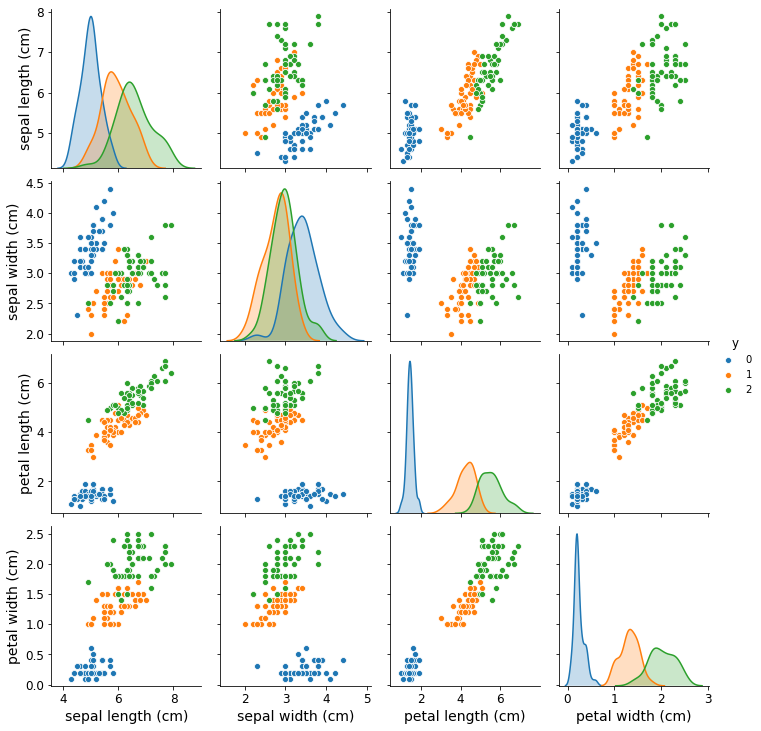

In [5]:
np.seterr(divide='ignore', invalid='ignore') # To silence a RuntimeWarning
import seaborn as sns
df = pd.DataFrame(X, columns = iris.feature_names)
df['y'] = y
sns.pairplot(df, hue='y')
plt.show()

What can you infer from the graph?

Now let's actually initialize and train our Decision Tree.

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier()
tree_cl.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Exercise 1: plot the decision tree.** Use the `plot_tree()` function to plot the decision tree `tree_cl`, correctly setting the feature names and the class names.

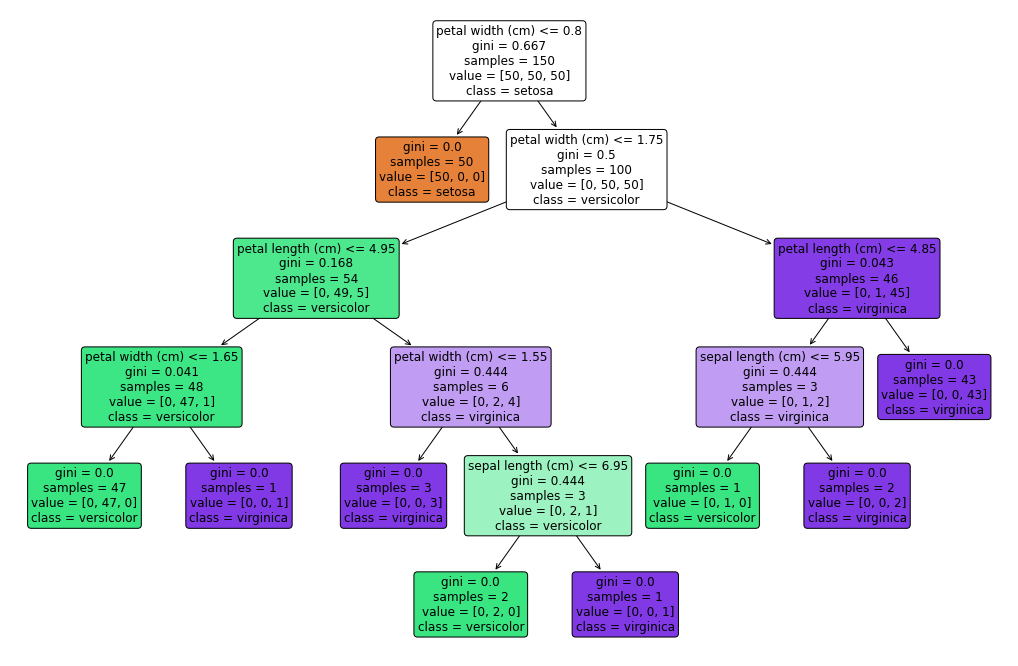

In [7]:
# Write your solution here

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(18,12))
res = plot_tree(
    tree_cl, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True, 
    filled=True, 
    ax=ax,
    fontsize=12
)

What is the "gini" value? This is the impurity index of that branching point. It is zero if all the items in the current subset are assigned to a class, greater than zero otherwise. The greater the gini value, the more spread are the values across multiple classes. 

$$ gini = \sum_{j} p_j (1 - p_j) $$ 

An analogue metric is entropy often used in decision trees is entropy, which is as well a measure of how spread are the values in multiple classes.

$$ H =  - \sum_{j} p_j \log{p_j} $$

### Decision surfaces for Decision Trees

Using the code below,we can plot the decision surface of a decision tree trained on pairs of features of the iris dataset. For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.



(0.0, 7.88, -0.9, 3.4800000000000044)

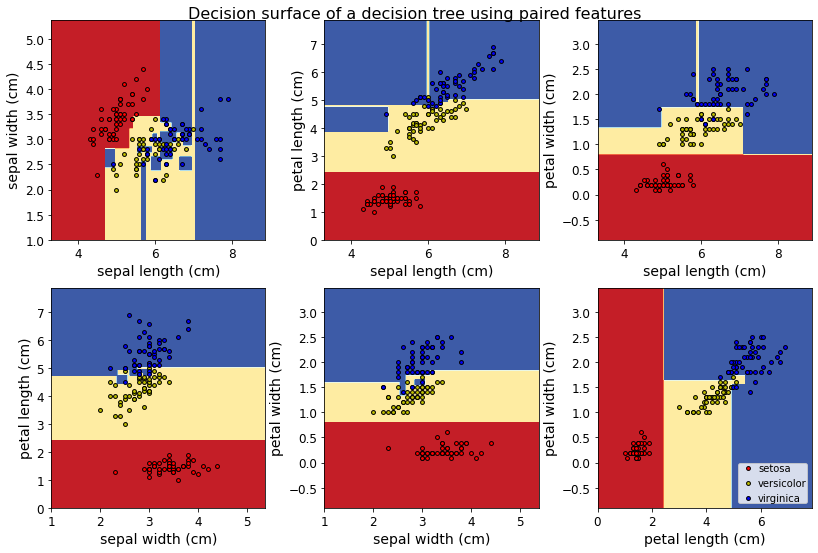

In [8]:
## Source code here: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features", size=16)
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

## 2. Introduction to Neural Networks: the Perceptron

Artificial Neural Networkss have been around for quite a while: they were first introduced in 1943 by the neurophysiologist Warren McCulloch and the mathematician Walter Pitts, in their landmark paper entitled “A Logical Calculus of Ideas Immanent in Nervous Activity.” A lot of research followed in the early fifties until, in 1957, Rosenblatt proposed the Perceptron Model.

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

X = iris.data[:, (2, 3)]  # we only consider petal length, petal width
y = (iris.target == 0).astype(np.int)  # Is the current isntance an Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(
    per_clf, X, y, scoring='accuracy', cv=5
)

array([1., 1., 1., 1., 1.])

We achieve 100% accuracy. This happens because Iris Setosa and "Not Setosa" are linearly sperable with respect to petal lenght and width.

scikit-Learn’s `Perceptron` class is equivalent to using an `SGDClassifier` with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

In their 1969 monograph _Perceptrons_, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of Perceptrons —- namely, the fact that they are unable to solve non-linear problems such as the XOR logic operation.

Some of these issues can be overcome, by stacking mutliple Perceptron layers one after the other, in what is called a _Multi-layer Perceptron_.

## 3. Introduction to Neural Networks: Multi-layer Perceptron (Exercise for Formative Feedback and Summative Assessment - worth 15 points)

Let's train a Multi-layer Perceptron on the IRIS Dataset using the `MLPClassifier` class from scikit-learn.
The evaluation will be done computing the confusion matrix for the classifier.

As a first step let's split the dataset into training (80% of the data) and test set (20%)

In [12]:
# Write your solution here



Then let's perform feature scaling (up to you whether you want to use standardisation or normalisation)

In [13]:
# Write your solution here


Now, let's train an `MLPClassifier` with just one hidden layer containing 100 neurons, with sigmoid (i.e. "logistic") activation, and "sgd" solver method.

In [14]:
# Write your code here



Now, evaluate the performance of your classifier using the confusion matrix. Compute and visualize the confusion matrix for our three classes

In [15]:
# Write your code here


Compute precision recall and F1 score for each class prediction on the training set.

In [16]:
# Write your code here


How does the result look like? If it's not too bad we may consider giving a go with the test set. Otherwise you might try to improve it tweking the number of neurons in the hidden layer, the number of hidden layers, the activation function, and the solver method among other parameters.

Once you are happy try it with the test set down here

In [17]:
## Try it here with the test set.